In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
data = pd.read_csv('data_csv.csv')
data.head()

,Index,ID,Cuisine,Ingredients
0,0,10259,greek,"romaine lettuce, black olives, grape tomatoes,..."
1,1,25693,southern_us,"plain flour, ground pepper, salt, tomatoes, gr..."
2,2,20130,filipino,"eggs, pepper, salt, mayonaise, cooking oil, gr..."
3,3,22213,indian,"water, vegetable oil, wheat, salt"
4,4,13162,indian,"black pepper, shallots, cornflour, cayenne pep..."


In [3]:
print("Data type : ", type(data))
print("Data dims : ", data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (39774, 4)


In [4]:
print(data.dtypes)

Index           int64
ID              int64
Cuisine        object
Ingredients    object
dtype: object


In [5]:
dataset = data.drop(["Index", "ID"], axis=1)# Remove unnecessary columns

In [6]:
dataset.head()  

,Cuisine,Ingredients
0,greek,"romaine lettuce, black olives, grape tomatoes,..."
1,southern_us,"plain flour, ground pepper, salt, tomatoes, gr..."
2,filipino,"eggs, pepper, salt, mayonaise, cooking oil, gr..."
3,indian,"water, vegetable oil, wheat, salt"
4,indian,"black pepper, shallots, cornflour, cayenne pep..."


In [7]:
from sklearn.feature_extraction.text import CountVectorizer #New stuff

In [8]:
def contains_seafood(ingredients):
    # Convert ingredients to lowercase to ensure case-insensitive matching
    ingredients = ingredients.lower()
    
    # Check if "milk" or "dairy" or "cheese" or "yoghurt" is present in the ingredients
    if "shrimp" in ingredients or "lobster" in ingredients or "crab" in ingredients or "fish" in ingredients or "clam" in ingredients or "mussel" in ingredients or "osyter" in ingredients or "scallop" in ingredients or "squid" in ingredients or "octopus" in ingredients:
        return 1
    else:
        return 0


dataset['contains_seafood'] = dataset['Ingredients'].apply(contains_seafood)

#

In [9]:
# Create a CountVectorizer to one-hot encode the Ingredients
vectorizer = CountVectorizer(binary=True, tokenizer=lambda x: x.split(', '))

# Fit and transform the Ingredients
ingredient_matrix = vectorizer.fit_transform(dataset['Ingredients']).toarray()

# Create a DataFrame with the one-hot encoded Ingredients
ingredient_df = pd.DataFrame(ingredient_matrix, columns=vectorizer.get_feature_names_out())

# Concatenate the one-hot encoded Ingredients with the original DataFrame
data_encoded = pd.concat([dataset, ingredient_df], axis=1)

# Drop the original "Ingredients" column, as it's no longer needed
data_encoded = data_encoded.drop("Ingredients", axis=1)

C:\Users\Lily\anacondapython\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [10]:
# Count the number of eggs per cuisine
peanut_count_per_cuisine = data_encoded.groupby("Cuisine").sum()

# Create a new column "Eggs_Count"
dataset['Seafood_Count'] = dataset['Cuisine'].map(peanut_count_per_cuisine['contains_seafood'])

In [11]:
dataset.head(n=60)

,Cuisine,Ingredients,contains_seafood,Seafood_Count
0,greek,"romaine lettuce, black olives, grape tomatoes,...",0,56
1,southern_us,"plain flour, ground pepper, salt, tomatoes, gr...",0,352
2,filipino,"eggs, pepper, salt, mayonaise, cooking oil, gr...",0,182
3,indian,"water, vegetable oil, wheat, salt",0,130
4,indian,"black pepper, shallots, cornflour, cayenne pep...",0,130
5,jamaican,"plain flour, sugar, butter, eggs, fresh ginger...",0,52
6,spanish,"olive oil, salt, medium shrimp, pepper, garlic...",1,181
7,italian,"sugar, pistachio nuts, white almond bark, flou...",0,486
8,mexican,"olive oil, purple onion, fresh pineapple, pork...",0,257
9,italian,"chopped tomatoes, fresh basil, garlic, extra-v...",0,486


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 8)

In [13]:
# Extract Response and Predictors
y = pd.DataFrame(dataset['Cuisine'])
X = pd.DataFrame(dataset['Seafood_Count'])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [14]:
# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

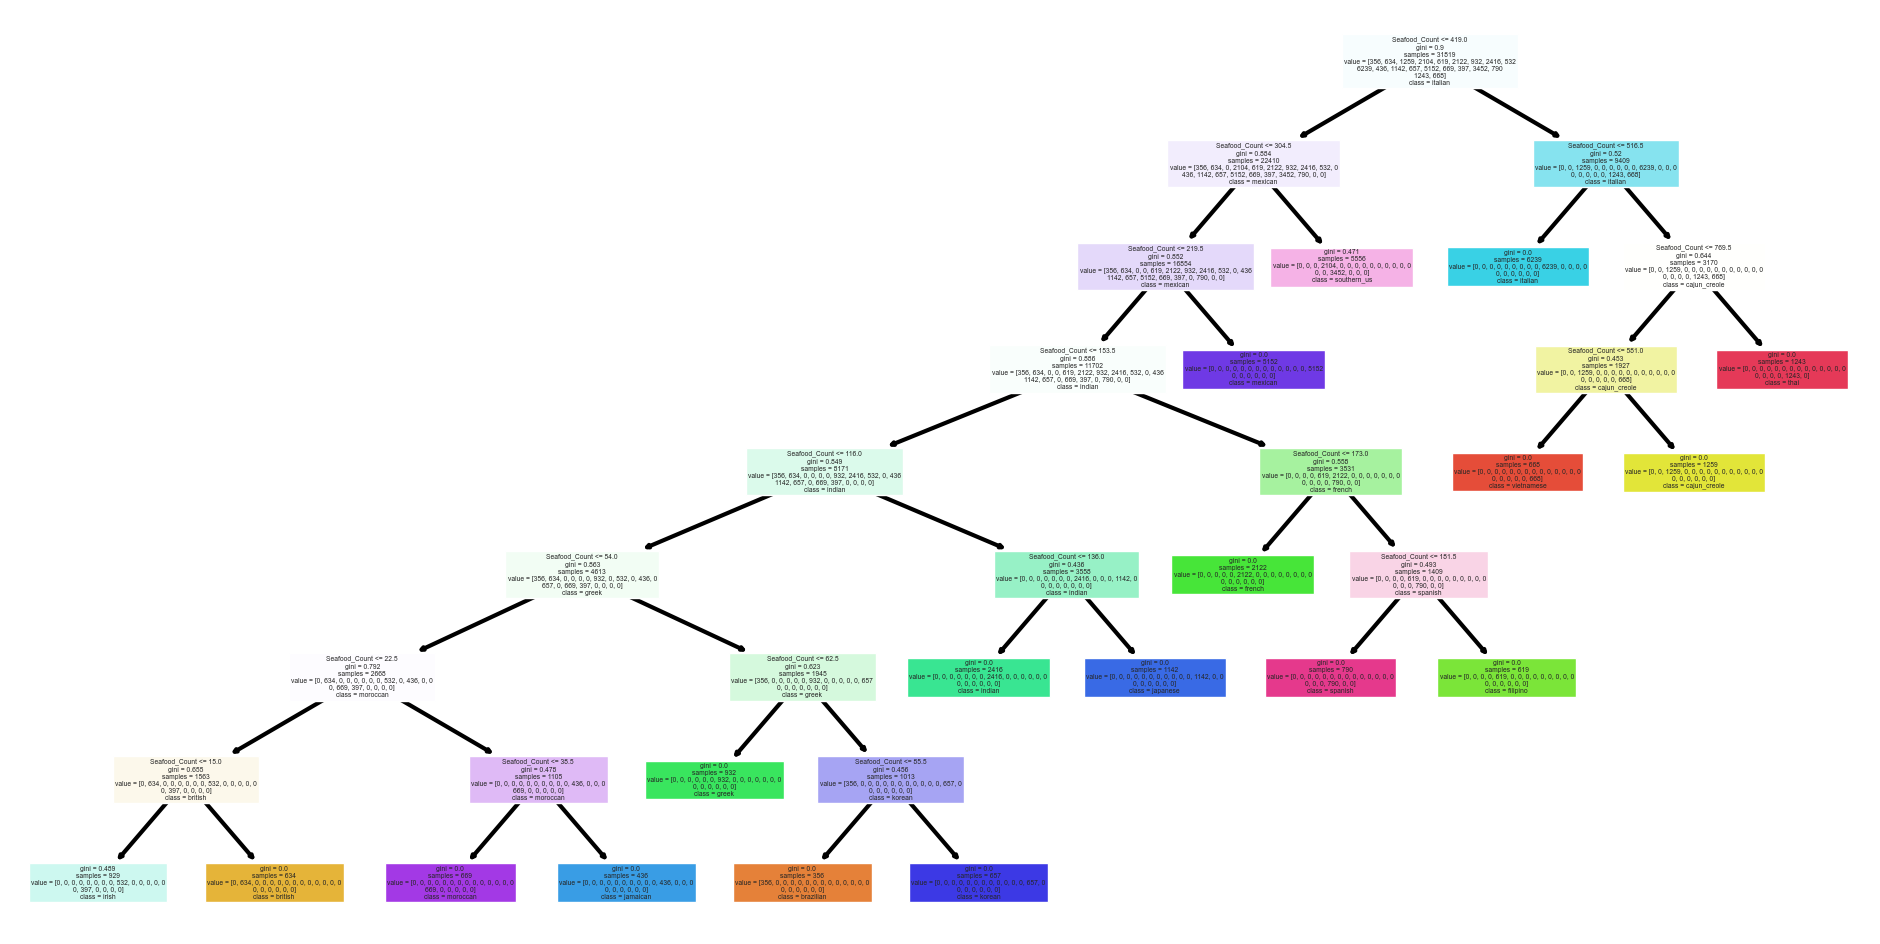

In [15]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(24, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns.tolist(),
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()



In [16]:
# Access the tree structure from the decision tree model
tree_structure = dectree.tree_

# Function to traverse the tree and find the top 3 cuisines with the least peanuts
def find_top_3_least_seafood_cuisines(node_index=0, top_cuisines=[]):
    if tree_structure.children_left[node_index] == tree_structure.children_right[node_index]:
        # This is a leaf node
        cuisine_index = np.argmax(tree_structure.value[node_index])
        cuisine_name = dectree.classes_[cuisine_index]
        Seafood_Count = tree_structure.value[node_index][0, cuisine_index]
        
        # Add this cuisine and egg count to the list
        top_cuisines.append((cuisine_name, Seafood_Count))
        
        # Sort the top_cuisines list based on egg count
        top_cuisines.sort(key=lambda x: x[1])
        
        # Keep only the top 3 cuisines
        if len(top_cuisines) > 3:
            top_cuisines.pop()
    
    else:
        # Recursively traverse the tree
        top_cuisines = find_top_3_least_seafood_cuisines(tree_structure.children_left[node_index], top_cuisines)
        top_cuisines = find_top_3_least_seafood_cuisines(tree_structure.children_right[node_index], top_cuisines)
    
    return top_cuisines

# Call the function to find the top 3 cuisines with the least peanuts
top_3_least_seafood_cuisines = find_top_3_least_seafood_cuisines()

print("Top 3 Cuisines with the least Seafood Products:", top_3_least_seafood_cuisines)


Top 3 Cuisines with the least Seafood Products: [('brazilian', 356.0), ('jamaican', 436.0), ('irish', 532.0)]


Classification Accuracy 	: 0.9213991640214966


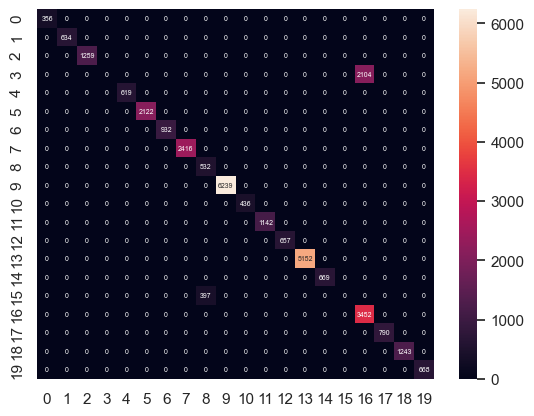

In [17]:
 # Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 5})
plt.show()
#Diagonal elements : true positives
#Off-diagonal elements : The cell at row i, column j (where i ≠ j) represents instances where the model predicted class i, but the actual class is j.

In [18]:
# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)


In [19]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9169076052796983



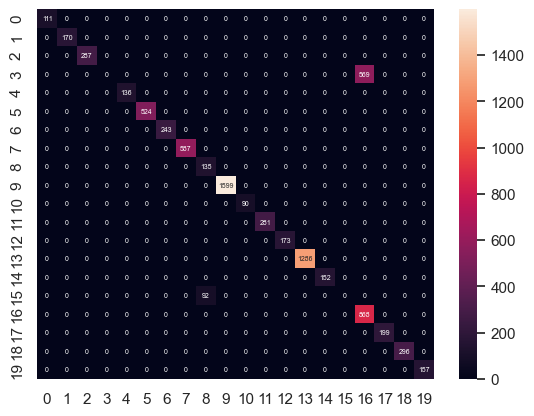

In [20]:
# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 5})
plt.show()